In [2]:
import cv2
import matplotlib.pyplot
import matplotlib.pyplot as plt
import numpy as np

In [124]:
im2 = cv2.imread('opencv_bootcamp_assets_NB8/scanned-form.jpg')
im1 = cv2.imread('form.jpg')

im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

im1_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

In [119]:
orb = cv2.ORB_create(500)

In [125]:
key1,desc1 = orb.detectAndCompute(im1_gray,None)
key2,desc2 = orb.detectAndCompute(im2_gray,None)

In [158]:
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_BRUTEFORCE_HAMMING)
matches = list(matcher.match(desc1,desc2,None))

In [159]:
matches.sort(key=lambda x: x.distance, reverse=False)
thresh = int(len(matches)*.1)
good_matches = matches[:thresh]

Text(0.5, 1.0, 'Original Form')

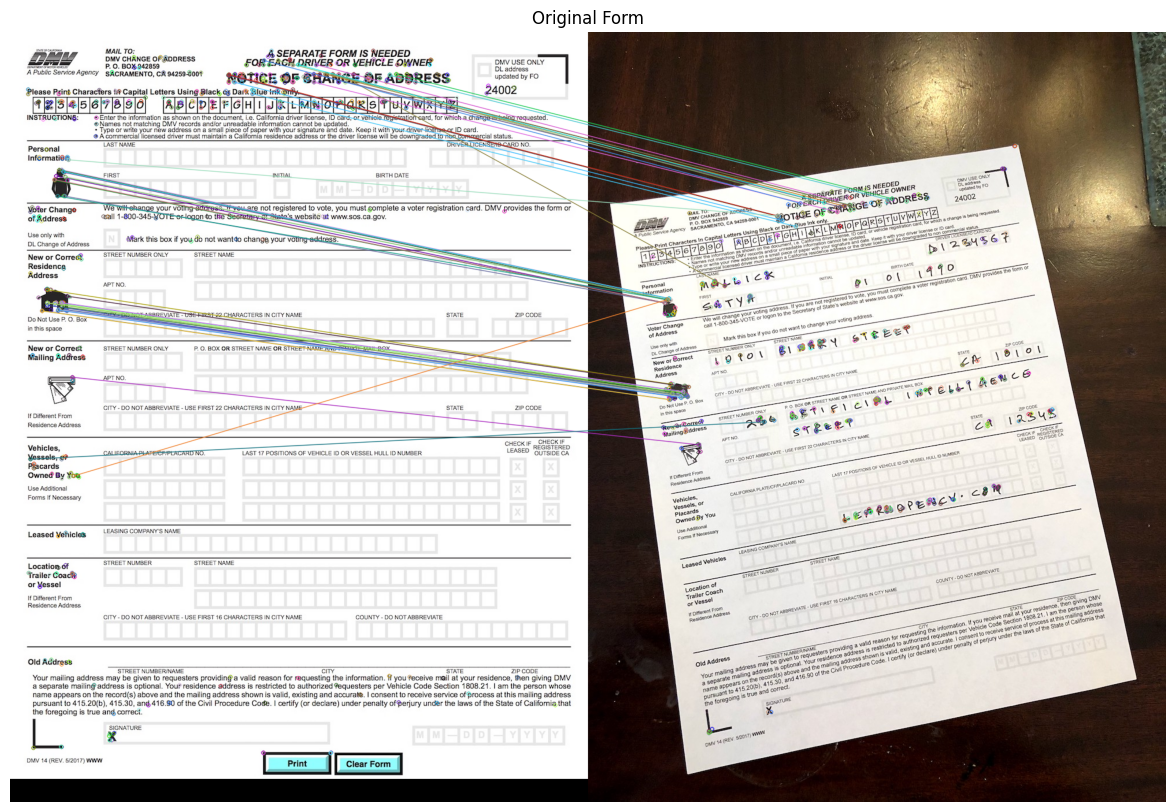

In [160]:
plt.figure(figsize=[40, 10])

plt.imshow(cv2.drawMatches(im1,key1,im2,key2,good_matches,None),cmap='grey')
plt.axis("off");plt.title("Original Form")

In [161]:
points1 = np.zeros((len(good_matches),2),dtype=np.float32)
points2 = np.zeros((len(good_matches),2),dtype=np.float32)

for i,match in enumerate(good_matches):
    points1[i,:] = key1[match.queryIdx].pt
    points2[i,:] = key2[match.trainIdx].pt




h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)


In [162]:
# Use homography to warp image
height, width, color = im1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))

Text(0.5, 1.0, 'Scanned Form')

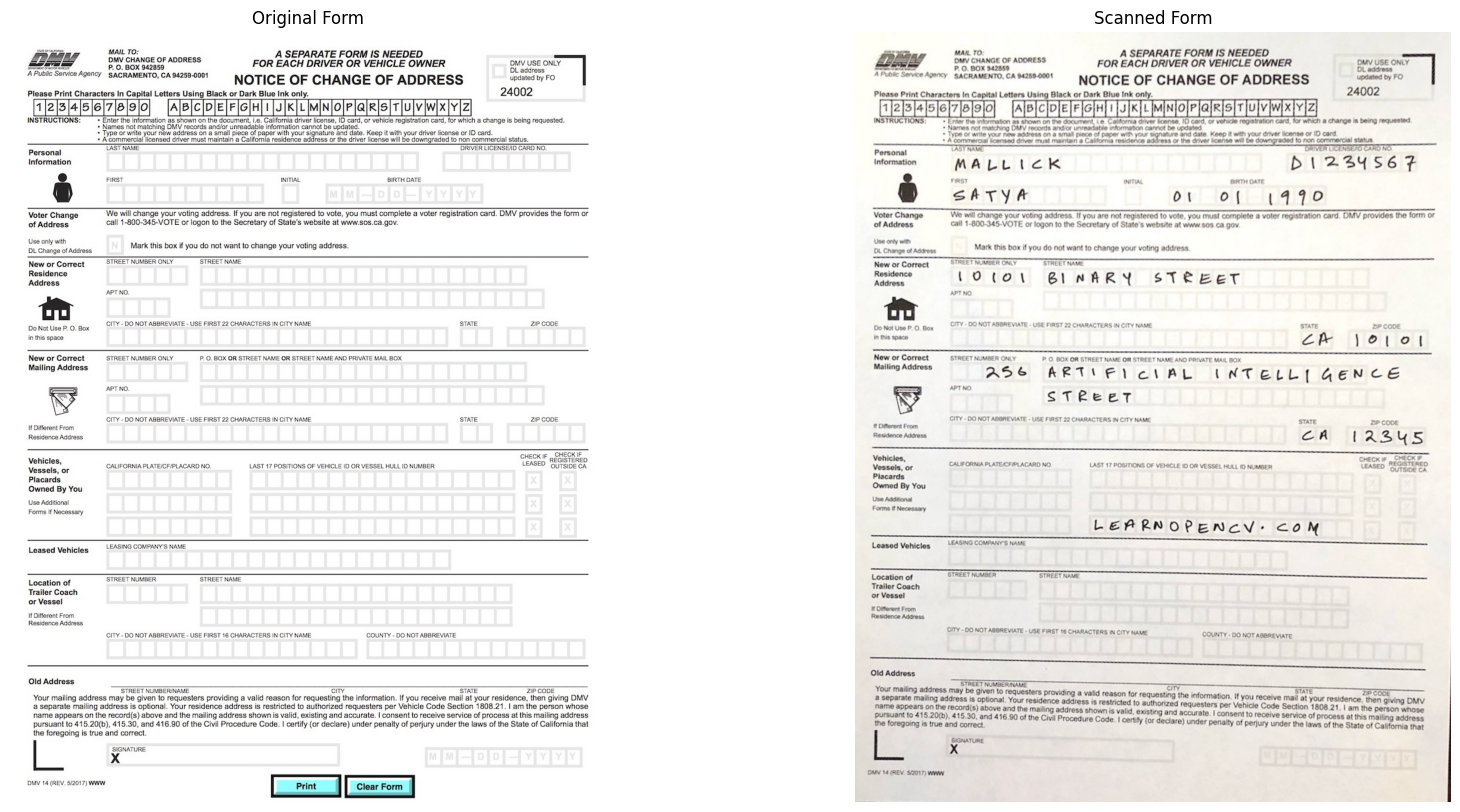

In [163]:
plt.figure(figsize=[20, 10])
plt.subplot(121);plt.imshow(im1);    plt.axis("off");plt.title("Original Form")
plt.subplot(122);plt.imshow(im2_reg);plt.axis("off");plt.title("Scanned Form")